In [1]:
import pandas as pd
import re
import numpy as np
from Predictions import * # Функции для сравнения в файле Predictions.py

# Обработка данных

In [2]:
# Загружаю предикшены TargetScan
target = pd.DataFrame(pd.read_csv('TargetScan_Predict.txt', sep='\t'))
target.head()

,a_Gene_ID,miRNA_family_ID,species_ID,MSA_start,MSA_end,UTR_start,UTR_end,Group_num,Site_type,miRNA in this species,Group_type,Species_in_this_group,Species_in_this_group_with_this_site_type,ORF_overlap
0,SARS_coronavirus_complete_genome,let-7-5p/98-5p,9606,18900,18906,18282,18288,1,7mer-m8,x,7mer-m8,9606,NaN,0
1,SARS_coronavirus_complete_genome,let-7-5p/98-5p,9606,2680,2685,2517,2522,2,6mer,x,6mer,9606,NaN,0
2,SARS_coronavirus_complete_genome,let-7-5p/98-5p,9606,26929,26934,25586,25591,3,6mer,x,6mer,9606,NaN,0
3,SARS_coronavirus_complete_genome,let-7-5p/98-5p,9606,4934,4941,4657,4663,4,7mer-1a,x,7mer-1a,9606,NaN,0
4,SARS_coronavirus_complete_genome,let-7-5p/98-5p,9606,9365,9371,8848,8854,5,7mer-m8,x,7mer-m8,9606,NaN,0


In [3]:
# Немного форматирую датафрейм под нашу задачу
target.rename(columns={'miRNA_family_ID': 'miRNA', 'a_Gene_ID': 'Virus'}, inplace=True)
target.drop(['species_ID', 'Group_num', 'Group_type',
                 'Species_in_this_group', 'Species_in_this_group_with_this_site_type'],
                axis=1, inplace=True)

In [4]:
cat = np.unique(target['Virus'].values)
print(cat)

['Human_coronavirus_OC43' 'Middle_East_respiratory_syndrome_coronavirus'
 'SARS_coronavirus_complete_genome'
 'Severe_acute_respiratory_syndrome_coronavirus_2']


In [5]:
# Загружаю предикшены TargetScan
# 4 коронавируса - после выравнивания, остальные - без
sarst = target[target['Virus'] == 'SARS_coronavirus_complete_genome']
merst = target[target['Virus'] == 'Middle_East_respiratory_syndrome_coronavirus']
oc43t = target[target['Virus'] == 'Human_coronavirus_OC43']
sars2t = target[target['Virus'] == 'Severe_acute_respiratory_syndrome_coronavirus_2']
hku1t = pd.read_csv('TargetScan_predictions/HCoV-HKU1.txt', sep='\t')
e229t = pd.read_csv('TargetScan_predictions/HCoV-229E.txt', sep='\t')
nl63t = pd.read_csv('TargetScan_predictions/HCoV-NL63.txt', sep='\t')
sars2t.head()

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap
46066,Severe_acute_respiratory_syndrome_coronavirus_2,let-7-5p/98-5p,10319,10324,9861,9866,6mer,x,0
46067,Severe_acute_respiratory_syndrome_coronavirus_2,let-7-5p/98-5p,12969,12974,12450,12455,6mer,x,0
46068,Severe_acute_respiratory_syndrome_coronavirus_2,let-7-5p/98-5p,19609,19615,19061,19067,7mer-1a,x,0
46069,Severe_acute_respiratory_syndrome_coronavirus_2,let-7a-2-3p/let-7g-3p,12332,12338,11835,11841,7mer-m8,x,0
46070,Severe_acute_respiratory_syndrome_coronavirus_2,let-7a-2-3p/let-7g-3p,13682,13687,13160,13165,6mer,x,0


In [6]:
list_name = [hku1t, e229t, nl63t]

In [7]:
# Немного форматирую датафреймы под нашу задачу
for tar in list_name:
    tar.rename(columns={'miRNA_family_ID': 'miRNA', 'a_Gene_ID': 'Virus'}, inplace=True)
    tar.drop(['species_ID', 'Group_num', 'Group_type',
                 'Species_in_this_group', 'Species_in_this_group_with_this_site_type'],
                axis=1, inplace=True)
sars2t.head()

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap
46066,Severe_acute_respiratory_syndrome_coronavirus_2,let-7-5p/98-5p,10319,10324,9861,9866,6mer,x,0
46067,Severe_acute_respiratory_syndrome_coronavirus_2,let-7-5p/98-5p,12969,12974,12450,12455,6mer,x,0
46068,Severe_acute_respiratory_syndrome_coronavirus_2,let-7-5p/98-5p,19609,19615,19061,19067,7mer-1a,x,0
46069,Severe_acute_respiratory_syndrome_coronavirus_2,let-7a-2-3p/let-7g-3p,12332,12338,11835,11841,7mer-m8,x,0
46070,Severe_acute_respiratory_syndrome_coronavirus_2,let-7a-2-3p/let-7g-3p,13682,13687,13160,13165,6mer,x,0


In [8]:
# Загружаю данные miRDB
sars2m = pd.DataFrame(pd.read_csv('miRDB_predictions/SARS-CoV-2_miRDB.txt', sep='\t'))
sarsm = pd.DataFrame(pd.read_csv('miRDB_predictions/SARS-CoV_miRDB.txt', sep='\t'))
oc43m = pd.DataFrame(pd.read_csv('miRDB_predictions/HCoV-OC43_miRDB.txt', sep='\t'))
mersm = pd.DataFrame(pd.read_csv('miRDB_predictions/MERS-CoV_miRDB.txt', sep='\t'))
hku1m = pd.DataFrame(pd.read_csv('miRDB_predictions/HCoV-HKU1_miRDB.txt', sep='\t'))
e229m = pd.DataFrame(pd.read_csv('miRDB_predictions/HCoV-229E_miRDB.txt', sep='\t'))
nl63m = pd.DataFrame(pd.read_csv('miRDB_predictions/HCoV-NL63_miRDB.txt', sep='\t'))
sars2m.head(1)

,Target Rank,Target Score,miRNA Name
0,1,99,hsa-miR-4288


In [9]:
# Загружаю данные экспрессии
lungs = pd.DataFrame(pd.read_csv('lungs_expression.txt', sep='\t'))
lungs.head(1)

,miRNA,TCGA-44-2655,TCGA-44-2657,TCGA-44-2661,TCGA-44-2665,TCGA-44-2668,TCGA-44-3396,TCGA-44-3398,TCGA-44-6144,TCGA-44-6776,...,TCGA-55-7910,TCGA-55-7911,TCGA-55-7914,TCGA-78-7163,TCGA-78-7540,TCGA-86-7711,TCGA-86-7713,TCGA-91-6835,TCGA-91-6836,TCGA-93-7348
0,hsa-let-7a-2-3p,0.152003,0.445284,0.415037,0.461904,0.336049,0.468045,0.153351,0.091148,0.148863,...,0.029,0.0,0.175087,0.074478,0.084064,0.167945,0.094859,0.152003,0.137504,0.058299


In [10]:
# Создаю столбец средних арифметических значений экспрессии
lungs['average'] = lungs.sum(axis=1)/(lungs.shape[1]-1)
lungs.head(1)

,miRNA,TCGA-44-2655,TCGA-44-2657,TCGA-44-2661,TCGA-44-2665,TCGA-44-2668,TCGA-44-3396,TCGA-44-3398,TCGA-44-6144,TCGA-44-6776,...,TCGA-55-7911,TCGA-55-7914,TCGA-78-7163,TCGA-78-7540,TCGA-86-7711,TCGA-86-7713,TCGA-91-6835,TCGA-91-6836,TCGA-93-7348,average
0,hsa-let-7a-2-3p,0.152003,0.445284,0.415037,0.461904,0.336049,0.468045,0.153351,0.091148,0.148863,...,0.0,0.175087,0.074478,0.084064,0.167945,0.094859,0.152003,0.137504,0.058299,0.152161


In [11]:
# Удаляю столбцы по отдельным клеточным линиям, оставляюю только название микроРНК
# и среднее значение экспрессии
lungs.drop(lungs.columns[[i for i in range(1,47)]], axis=1, inplace=True)
lungs.head(1)

,miRNA,average
0,hsa-let-7a-2-3p,0.152161


# Рабочий поцесс:
## Cортировка по TargetScore и по экспрессии
### Все функции описаны в файле Predictions.py

In [12]:
all_score(sars2m, sars2t, lungs, 
          'Intermediate_results/SARS_CoV_2_FullComparasion_scoresort')
all_exp(sars2m, sars2t, lungs, 
        'Intermediate_results/expsort/SARS_CoV_2_FullComparasion_expsort')

In [13]:
all_score(sarsm, sarst, lungs,
          'Intermediate_results/SARS_CoV_FullComparasion_scoresort')
all_exp(sarsm, sarst, lungs,
        'Intermediate_results/expsort/SARS_CoV_FullComparasion_expsort')

In [14]:
all_score(mersm, merst, lungs,
          'Intermediate_results/MERS_CoV_FullComparasion_scoresort')
all_exp(mersm, merst, lungs,
        'Intermediate_results/expsort/MERS_CoV_FullComparasion_expsort')

In [15]:
all_score(oc43m, oc43t, lungs,
          'Intermediate_results/HCoV_OC43_FullComparasion_scoresort')
all_exp(oc43m, oc43t, lungs,
        'Intermediate_results/expsort/HCoV_OC43_FullComparasion_expsort')

In [16]:
all_score(hku1m, hku1t, lungs,
          'Intermediate_results/HCoV_HKU1_FullComparasion_scoresort')
all_exp(hku1m, hku1t, lungs,
        'Intermediate_results/expsort/HCoV_HKU_FullComparasion_expsort')

In [17]:
all_score(e229m, e229t, lungs,
          'Intermediate_results/HCoV_229E_FullComparasion_scoresort')
all_exp(e229m, e229t, lungs,
        'Intermediate_results/expsort/HCoV_229E_FullComparasion_expsort')

In [18]:
all_score(nl63m, nl63t, lungs,
          'Intermediate_results/HCoV_NL63_FullComparasion_scoresort')
all_exp(nl63m, nl63t, lungs,
        'Intermediate_results/expsort/HCoV_NL63_FullComparasion_expsort')

In [19]:
# фильтрую фрейм с экспрессией по среднему значению экспрессии
lungs.sort_values('average', ascending=False, inplace=True)
save_top(lungs, 'Intermediate_results/expression_sort')

## Первые результаты

In [20]:
first_result('Intermediate_results/SARS_CoV_2_FullComparasion_scoresort',
             'Results/Result_SARS2', lungs)

In [21]:
first_result('Intermediate_results/SARS_CoV_FullComparasion_scoresort',
             'Results/Result_SARS', lungs)

In [22]:
first_result('Intermediate_results/MERS_CoV_FullComparasion_scoresort',
             'Results/Result_MERS', lungs)

In [23]:
first_result('Intermediate_results/HCoV_OC43_FullComparasion_scoresort',
             'Results/Result_OC43', lungs)

In [24]:
first_result('Intermediate_results/HCoV_HKU1_FullComparasion_scoresort',
             'Results/Result_HKU1', lungs)

In [25]:
first_result('Intermediate_results/HCoV_229E_FullComparasion_scoresort',
             'Results/Result_229E', lungs)

In [26]:
first_result('Intermediate_results/HCoV_NL63_FullComparasion_scoresort',
             'Results/Result_NL63', lungs)

## Сравнение сайтов связывания

In [27]:
locus(sars2t, 'Result_SARS2', 'SARS2')

[False]


In [28]:
locus(sarst, 'Result_SARS', 'SARS')

[False]


In [29]:
locus(merst, 'Result_MERS', 'MERS')

[False]


In [30]:
locus(oc43t, 'Result_OC43', 'OC43')

[False]


In [31]:
locus(hku1t, 'Result_HKU1', 'HKU1')

[False]


In [32]:
locus(e229t, 'Result_229E','229E')

[False]


In [33]:
locus(nl63t, 'Result_NL63', 'NL63')

[False]


## Смотрим результаты
### Результаты пересечений

In [34]:
pd.DataFrame(pd.read_csv('Results/Result_SARS2.txt', sep='\t'))

,miRNA,miRDB score,site type,average
0,miR-195-5p,99,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.573726
1,miR-16-5p,99,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.190135
2,miR-21-3p,98,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.794326
3,miR-186-5p,95,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",3.063465
4,miR-141-3p,91,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",3.374535
5,miR-3065-3p,90,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.622729
6,miR-194-5p,90,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.668411
7,miR-200a-3p,90,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.994519
8,miR-335-3p,89,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.052876
9,miR-152-3p,89,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",3.442817


In [35]:
pd.DataFrame(pd.read_csv('Results/Result_SARS.txt', sep='\t'))

,miRNA,miRDB score,site type,average
0,miR-195-5p,100,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.573726
1,miR-16-5p,100,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.190135
2,miR-3065-3p,93,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.622729
3,miR-21-3p,92,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.794326
4,miR-107,90,"['6mer', '7mer-1a', '7mer-m8']",2.234866
5,miR-28-3p,86,"['6mer', '7mer-1a', '8mer-1a']",6.911365


In [36]:
pd.DataFrame(pd.read_csv('Results/Result_MERS.txt', sep='\t'))

,miRNA,miRDB score,site type,average
0,miR-16-5p,96,"['6mer', '7mer-m8', '8mer-1a']",4.190135
1,miR-195-5p,96,"['6mer', '7mer-m8', '8mer-1a']",2.573726
2,miR-200a-3p,89,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.994519
3,miR-141-3p,89,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",3.374535
4,let-7b-3p,87,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.595111
5,miR-32-5p,83,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.362582
6,miR-3065-3p,82,"['6mer', '7mer-1a', '8mer-1a']",2.622729
7,miR-335-3p,81,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.052876
8,miR-34c-3p,80,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.479719
9,miR-1-3p,80,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.599633


In [37]:
pd.DataFrame(pd.read_csv('Results/Result_OC43.txt', sep='\t'))

,miRNA,miRDB score,site type,average
0,miR-21-3p,99,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.794326
1,miR-126-5p,97,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.089520
2,miR-195-5p,96,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.573726
3,miR-16-5p,96,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.190135
4,miR-486-5p,95,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",5.772000
5,miR-186-5p,90,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",3.063465
6,miR-34c-3p,86,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.479719
7,let-7b-3p,86,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.595111
8,miR-28-5p,85,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.120022
9,miR-194-5p,83,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.668411


In [38]:
pd.DataFrame(pd.read_csv('Results/Result_HKU1.txt', sep='\t'))

,miRNA,miRDB score,site type,average
0,miR-21-3p,100,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.794326
1,miR-126-5p,98,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.089520
2,miR-186-5p,98,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",3.063465
3,let-7b-3p,97,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.595111
4,miR-625-3p,94,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.592471
5,miR-139-5p,93,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.373558
6,miR-194-5p,91,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.668411
7,miR-374a-3p,88,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.760408


In [39]:
pd.DataFrame(pd.read_csv('Results/Result_229E.txt', sep='\t'))

,miRNA,miRDB score,site type,average
0,miR-21-3p,100,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.794326
1,miR-195-5p,97,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.573726
2,miR-194-5p,97,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.668411
3,miR-16-5p,96,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.190135
4,miR-338-3p,92,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.638347
5,miR-132-3p,91,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.232646
6,miR-542-3p,89,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.545125
7,miR-3065-3p,87,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.622729
8,miR-107,87,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.234866
9,miR-128-3p,85,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.191306


In [40]:
pd.DataFrame(pd.read_csv('Results/Result_NL63.txt', sep='\t'))

,miRNA,miRDB score,site type,average
0,miR-21-3p,100,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.794326
1,miR-361-5p,98,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",3.406495
2,miR-194-5p,98,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.668411
3,miR-126-5p,98,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.089520
4,miR-197-3p,96,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",3.802167
5,miR-195-5p,95,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.573726
6,miR-16-5p,95,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.190135
7,miR-132-3p,95,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",2.232646
8,miR-34c-3p,94,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",1.479719
9,miR-374a-3p,87,"['6mer', '7mer-1a', '7mer-m8', '8mer-1a']",4.760408


### Результаты с сайтами связывания (NaN = UTR в генах)

In [41]:
locus_sars = pd.DataFrame(pd.read_csv('Results/locus_Result_SARS.txt', sep='\t'))
locus_sars.head()

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap,miRDB score,average,Locus_start,Locus_end,Protein_start,Protein_end
0,SARS_coronavirus_complete_genome,miR-195-5p,10255,10260,9727,9732,6mer,x,0,100,2.573726,orf1ab,orf1ab,orf1a polyprotein (pp1a),orf1a polyprotein (pp1a)
1,SARS_coronavirus_complete_genome,miR-195-5p,11152,11158,10611,10617,7mer-m8,x,0,100,2.573726,orf1ab,orf1ab,orf1a polyprotein (pp1a),orf1a polyprotein (pp1a)
2,SARS_coronavirus_complete_genome,miR-195-5p,11321,11327,10779,10785,7mer-m8,x,0,100,2.573726,orf1ab,orf1ab,orf1a polyprotein (pp1a),orf1a polyprotein (pp1a)
3,SARS_coronavirus_complete_genome,miR-195-5p,11336,11341,10794,10799,6mer,x,0,100,2.573726,orf1ab,orf1ab,orf1a polyprotein (pp1a),orf1a polyprotein (pp1a)
4,SARS_coronavirus_complete_genome,miR-195-5p,11617,11623,11072,11078,7mer-m8,x,0,100,2.573726,orf1ab,orf1ab,orf1a polyprotein (pp1a),orf1a polyprotein (pp1a)


In [42]:
locus_sars2 = pd.DataFrame(pd.read_csv('Results/locus_Result_SARS2.txt', sep='\t'))
locus_sars2[locus_sars2['Locus_start'].isnull()]

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap,miRDB score,average,Locus_start,Locus_end,Protein_start,Protein_end
8,Severe_acute_respiratory_syndrome_coronavirus_2,miR-195-5p,205,213,189,194,6mer,x,0,99,2.573726,NaN,NaN,NaN,NaN
35,Severe_acute_respiratory_syndrome_coronavirus_2,miR-16-5p,205,213,189,194,6mer,x,0,99,4.190135,NaN,NaN,NaN,NaN
392,Severe_acute_respiratory_syndrome_coronavirus_2,miR-582-3p,27823,27828,26492,26497,6mer,x,0,86,3.000607,NaN,NaN,NaN,NaN
527,Severe_acute_respiratory_syndrome_coronavirus_2,miR-142-5p,26564,26570,25391,25397,7mer-1a,x,0,82,1.991582,NaN,ORF3a,NaN,ORF3a protein
543,Severe_acute_respiratory_syndrome_coronavirus_2,miR-142-5p,26564,26570,25391,25397,7mer-1a,x,0,82,1.991582,NaN,ORF3a,NaN,ORF3a protein


In [43]:
locus_mers = pd.DataFrame(pd.read_csv('Results/locus_Result_MERS.txt', sep='\t'))
locus_mers.head()

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap,miRDB score,average,Locus_start,Locus_end,Protein_start,Protein_end
0,Middle_East_respiratory_syndrome_coronavirus,miR-195-5p,11314,11320,10811,10816,6mer,x,0,96,2.573726,orf1ab,orf1ab,1A polyprotein,1A polyprotein
1,Middle_East_respiratory_syndrome_coronavirus,miR-195-5p,12327,12334,11801,11808,8mer-1a,x,0,96,2.573726,orf1ab,orf1ab,1A polyprotein,1A polyprotein
2,Middle_East_respiratory_syndrome_coronavirus,miR-195-5p,15315,15322,14752,14759,8mer-1a,x,0,96,2.573726,orf1ab,orf1ab,1ab polyprotein,1ab polyprotein
3,Middle_East_respiratory_syndrome_coronavirus,miR-195-5p,16855,16862,16292,16299,8mer-1a,x,0,96,2.573726,orf1ab,orf1ab,1ab polyprotein,1ab polyprotein
4,Middle_East_respiratory_syndrome_coronavirus,miR-195-5p,17169,17175,16606,16612,7mer-m8,x,0,96,2.573726,orf1ab,orf1ab,1ab polyprotein,1ab polyprotein


In [44]:
locus_oc43 = pd.DataFrame(pd.read_csv('Results/locus_Result_OC43.txt', sep='\t'))
locus_oc43.head()

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap,miRDB score,average,Locus_start,Locus_end,Protein_start,Protein_end
0,Human_coronavirus_OC43,miR-21-3p,12187,12192,11565,11570,6mer,x,0,99,4.794326,orf1ab,orf1ab,Orf1ab,Orf1ab
1,Human_coronavirus_OC43,miR-21-3p,12307,12312,11685,11690,6mer,x,0,99,4.794326,orf1ab,orf1ab,Orf1ab,Orf1ab
2,Human_coronavirus_OC43,miR-21-3p,1381,1387,1331,1337,7mer-m8,x,0,99,4.794326,orf1ab,orf1ab,Orf1ab,Orf1ab
3,Human_coronavirus_OC43,miR-21-3p,138,144,126,132,7mer-m8,x,0,99,4.794326,NaN,NaN,NaN,NaN
4,Human_coronavirus_OC43,miR-21-3p,14661,14667,14002,14008,7mer-m8,x,0,99,4.794326,orf1ab,orf1ab,Orf1ab,Orf1ab


In [45]:
locus_hku1 = pd.DataFrame(pd.read_csv('Results/locus_Result_HKU1.txt', sep='\t'))
locus_hku1.head()

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap,miRDB score,average,Locus_start,Locus_end,Protein_start,Protein_end
0,HKU1,miR-21-3p,10973,10978,10973,10978,6mer,x,0,100,4.794326,orf1ab,orf1ab,orf1ab polyprotein,orf1ab polyprotein
1,HKU1,miR-21-3p,11101,11108,11101,11108,8mer-1a,x,0,100,4.794326,orf1ab,orf1ab,orf1ab polyprotein,orf1ab polyprotein
2,HKU1,miR-21-3p,11242,11249,11242,11249,8mer-1a,x,0,100,4.794326,orf1ab,orf1ab,orf1ab polyprotein,orf1ab polyprotein
3,HKU1,miR-21-3p,11825,11830,11825,11830,6mer,x,0,100,4.794326,orf1ab,orf1ab,orf1ab polyprotein,orf1ab polyprotein
4,HKU1,miR-21-3p,13168,13174,13168,13174,7mer-m8,x,0,100,4.794326,orf1ab,orf1ab,orf1ab polyprotein,orf1ab polyprotein


In [46]:
locus_e229 = pd.DataFrame(pd.read_csv('Results/locus_Result_229E.txt', sep='\t'))
locus_e229.head()

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap,miRDB score,average,Locus_start,Locus_end,Protein_start,Protein_end
0,229E,miR-21-3p,10078,10085,10078,10085,8mer-1a,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1a,replicase polyprotein 1a
1,229E,miR-21-3p,10357,10362,10357,10362,6mer,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1a,replicase polyprotein 1a
2,229E,miR-21-3p,10633,10639,10633,10639,7mer-m8,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1a,replicase polyprotein 1a
3,229E,miR-21-3p,10675,10682,10675,10682,8mer-1a,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1a,replicase polyprotein 1a
4,229E,miR-21-3p,10778,10783,10778,10783,6mer,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1a,replicase polyprotein 1a


In [47]:
locus_nl63 = pd.DataFrame(pd.read_csv('Results/locus_Result_NL63.txt', sep='\t'))
locus_nl63.head()

,Virus,miRNA,MSA_start,MSA_end,UTR_start,UTR_end,Site_type,miRNA in this species,ORF_overlap,miRDB score,average,Locus_start,Locus_end,Protein_start,Protein_end
0,NL63,miR-21-3p,10697,10702,10697,10702,6mer,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1ab,replicase polyprotein 1ab
1,NL63,miR-21-3p,11434,11440,11434,11440,7mer-m8,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1ab,replicase polyprotein 1ab
2,NL63,miR-21-3p,1165,1172,1165,1172,8mer-1a,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1ab,replicase polyprotein 1ab
3,NL63,miR-21-3p,11743,11749,11743,11749,7mer-m8,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1ab,replicase polyprotein 1ab
4,NL63,miR-21-3p,12994,12999,12994,12999,6mer,x,0,100,4.794326,1ab,1ab,replicase polyprotein 1ab,replicase polyprotein 1ab


# Строим гафики

## Сравнение начальных позиций сайта и конечных позиций сайта связывания по РНК геному (генам) (Только по выравненным последовательностям четырех коронавирусов)

#### Хорошего качества картинка в Graphs/RNA_virus.png
#### код в Graphs/Graph_gene_comparison.py

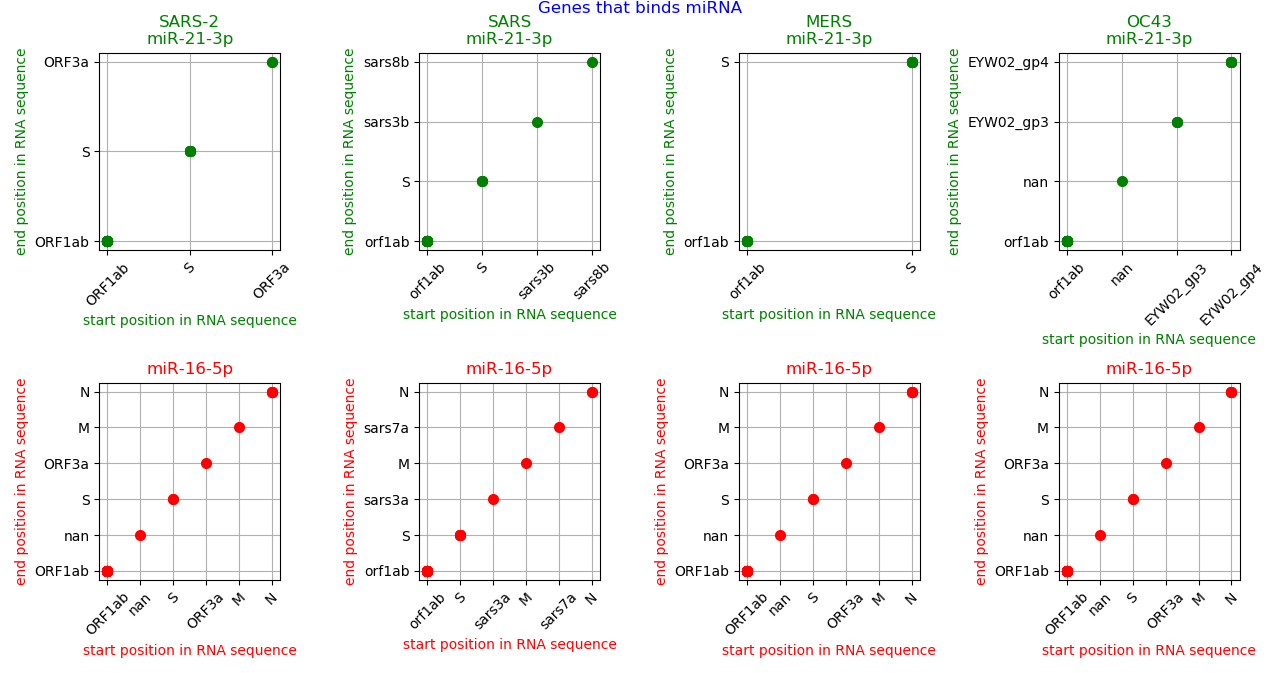

## Сравнение начальных позиций сайта и конечных позиций сайта связывания по белковому сиквенсу (Только по выравненным последовательностям четырех коронавирусов)

#### Хорошего качества картинка в Graphs/proteins_virus.png
#### код в Graphs/Graph_protein_comparison.py

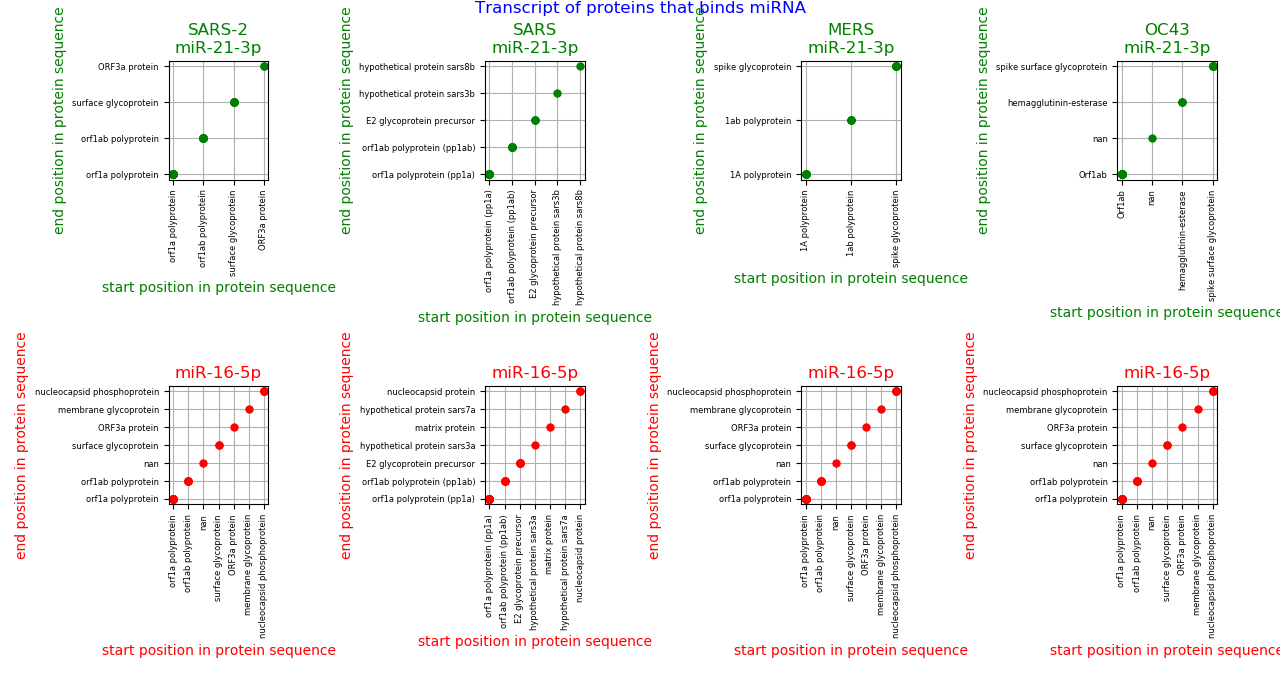

## Сравнение точек начала и конца сайта связывания (Только по выравненным последовательностям четырех коронавирусов)

In [48]:
import matplotlib.pyplot as plt

/home/alexmakh/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


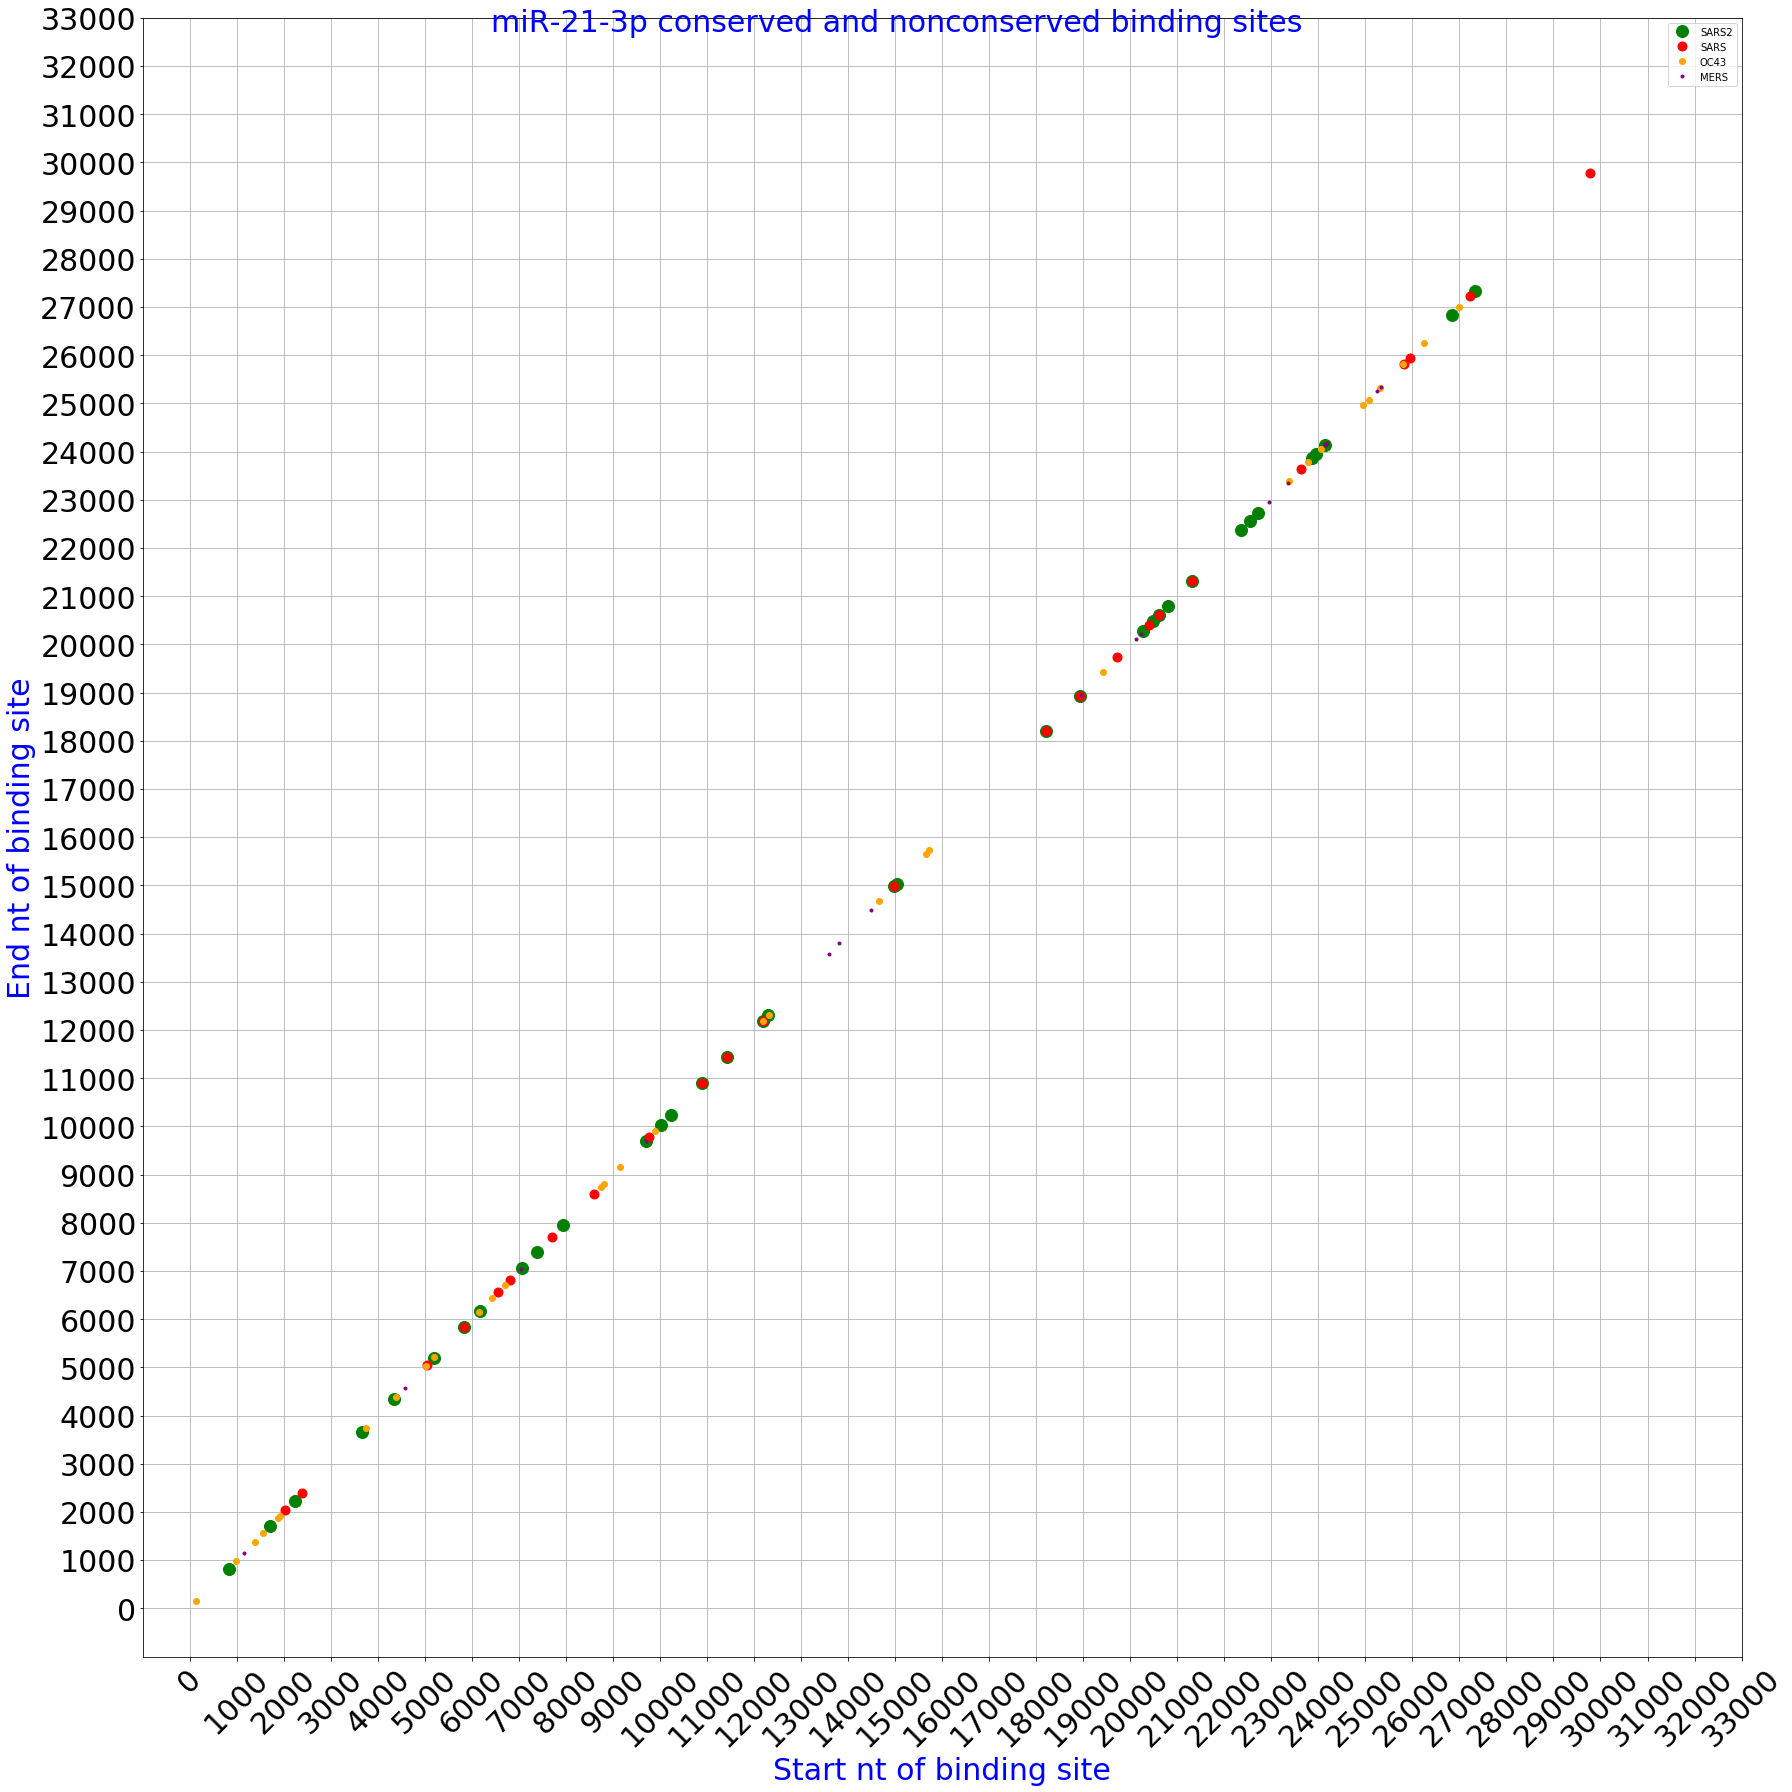

In [49]:
mirna = 'miR-21-3p'

x1 = locus_sars[locus_sars['miRNA'] == mirna]['MSA_start'].tolist()
y1 = locus_sars[locus_sars['miRNA'] == mirna]['MSA_end'].tolist()

x2 = locus_oc43[locus_oc43['miRNA'] == mirna]['MSA_start'].tolist()
y2 = locus_oc43[locus_oc43['miRNA'] == mirna]['MSA_end'].tolist()

x3 = locus_sars2[locus_sars2['miRNA'] == mirna]['MSA_start'].tolist()
y3 = locus_sars2[locus_sars2['miRNA'] == mirna]['MSA_end'].tolist()

x4 = locus_mers[locus_mers['miRNA'] == mirna]['MSA_start'].tolist()
y4 = locus_mers[locus_mers['miRNA'] == mirna]['MSA_end'].tolist()

fig, ax = plt.subplots(1, 1, figsize=(25, 25), tight_layout=True)
fig.suptitle('miR-21-3p conserved and nonconserved binding sites',
             va='baseline', color='blue', fontsize=30)

ax.set_xlabel('Start nt of binding site', fontsize=30, color='blue')
ax.set_ylabel('End nt of binding site', fontsize=30, color='blue')
ax.yaxis.set_ticks(np.arange(0, 33001, 1000))
ax.xaxis.set_ticks(np.arange(0, 33001, 1000))
ax.yaxis.set_tick_params(labelsize=30)
ax.xaxis.set_tick_params(labelrotation=45, labelsize=30)
ax.axis([-1000, 33000, -1000, 33000])
ax.grid()

ax = plt.plot(x3, y3, 'og', markersize=12, label='SARS2')
ax = plt.plot(x1, y1, 'or', markersize=9, label='SARS')
ax = plt.plot(x2, y2, 'o', color='orange', markersize=6, label='OC43')
ax = plt.plot(x4, y4, 'o', color='purple', markersize=3, label='MERS')

plt.legend()

plt.show()

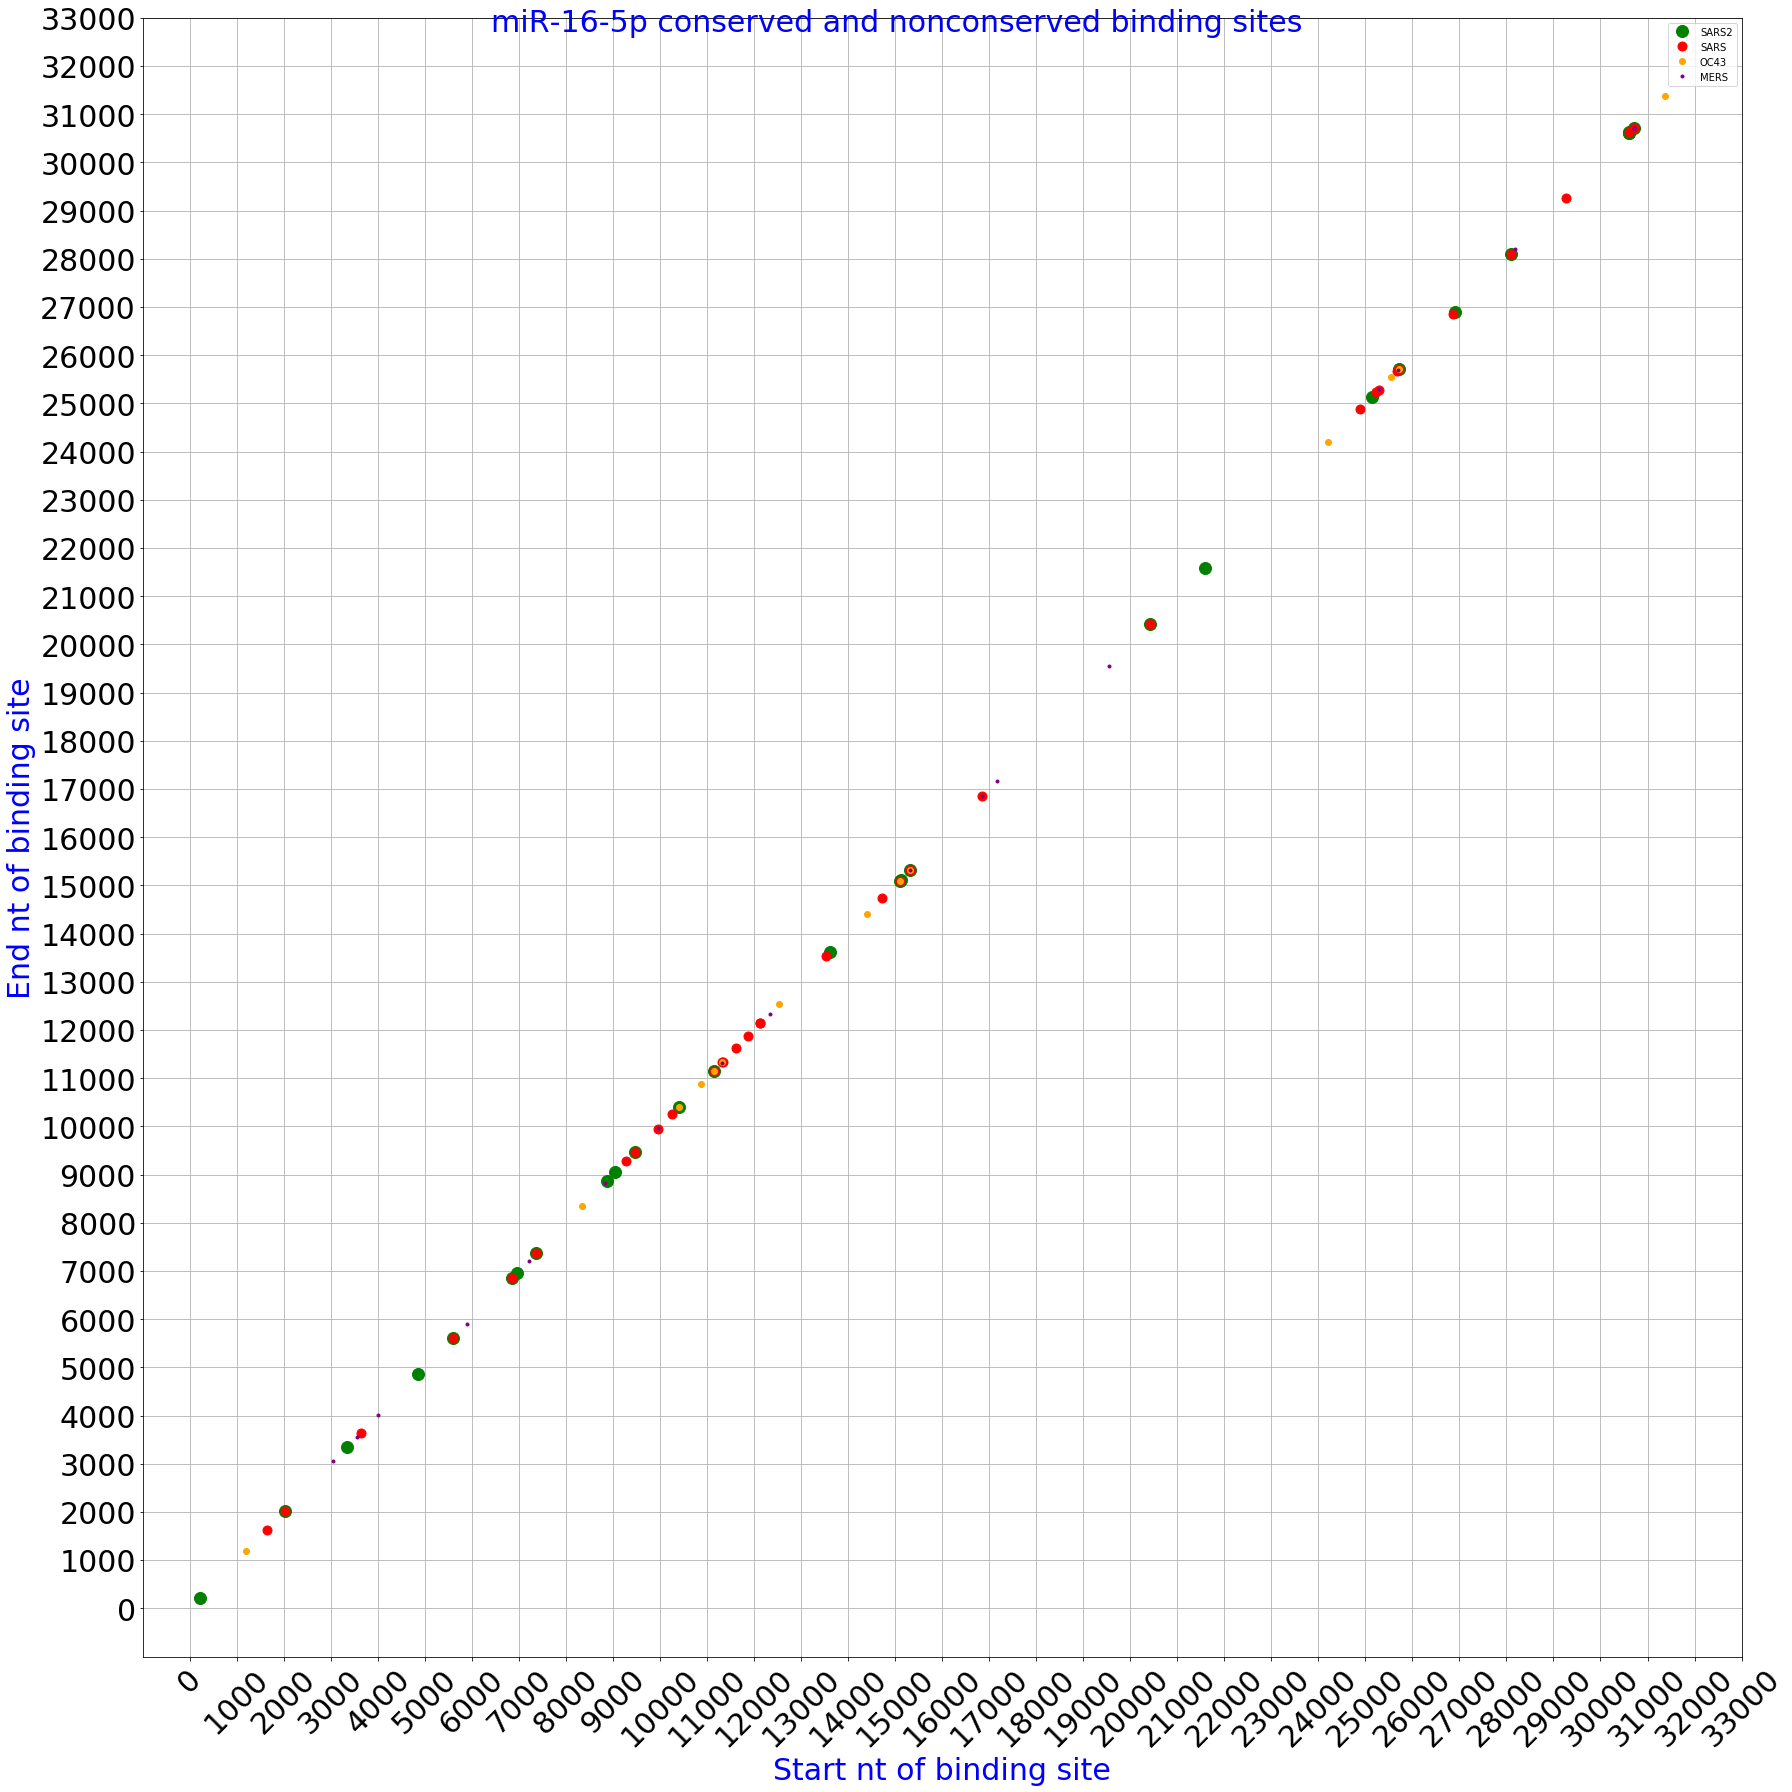

In [50]:
mirna = 'miR-16-5p'

x1 = locus_sars[locus_sars['miRNA'] == mirna]['MSA_start'].tolist()
y1 = locus_sars[locus_sars['miRNA'] == mirna]['MSA_end'].tolist()

x2 = locus_oc43[locus_oc43['miRNA'] == mirna]['MSA_start'].tolist()
y2 = locus_oc43[locus_oc43['miRNA'] == mirna]['MSA_end'].tolist()

x3 = locus_sars2[locus_sars2['miRNA'] == mirna]['MSA_start'].tolist()
y3 = locus_sars2[locus_sars2['miRNA'] == mirna]['MSA_end'].tolist()

x4 = locus_mers[locus_mers['miRNA'] == mirna]['MSA_start'].tolist()
y4 = locus_mers[locus_mers['miRNA'] == mirna]['MSA_end'].tolist()

fig, ax = plt.subplots(1, 1, figsize=(25, 25), tight_layout=True)
fig.suptitle('miR-16-5p conserved and nonconserved binding sites',
             va='baseline', color='blue', fontsize=30)

ax.set_xlabel('Start nt of binding site', fontsize=30, color='blue')
ax.set_ylabel('End nt of binding site', fontsize=30, color='blue')
ax.yaxis.set_ticks(np.arange(0, 33001, 1000))
ax.xaxis.set_ticks(np.arange(0, 33001, 1000))
ax.yaxis.set_tick_params(labelsize=30)
ax.xaxis.set_tick_params(labelrotation=45, labelsize=30)
ax.axis([-1000, 33000, -1000, 33000])
ax.grid()

ax = plt.plot(x3, y3, 'og', markersize=12, label='SARS2')
ax = plt.plot(x1, y1, 'or', markersize=9, label='SARS')
ax = plt.plot(x2, y2, 'o', color='orange', markersize=6, label='OC43')
ax = plt.plot(x4, y4, 'o', color='purple', markersize=3, label='MERS')

plt.legend()

plt.show()

### Также в /Graphs есть отдельно скрипты и картинки для этих графиков